## Introduction to Time Series Analysis

Libraries and Data

In [63]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import month_plot, quarter_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the data
df = pd.read_csv("C:/Users/Time Series Forecasting/TSF.2.bitcoin_price.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


Time Series Index

In [65]:
# Convert 'Date' to a Datetime and set as index
df['Date'] = pd.to_datetime(df['Date'], format = "%Y-%m-%d")
df.set_index('Date', inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [66]:
# Select the Bitcoin Data for November 2021
df.loc['2021-11-09']

Open         6.754973e+04
High         6.853034e+04
Low          6.638206e+04
Close        6.697183e+04
Adj Close    6.697183e+04
Volume       4.235799e+10
Name: 2021-11-09 00:00:00, dtype: float64

In [67]:
# Loading the Data and Setting the Index
#df1 = pd.read_csv("bitcoin_price.csv", index_col = "Date", parse_dates=True)
#df1.index

In [68]:
# Resampling to Monthly Frequency and calculate the mean closing price
df.resample('M').mean()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-30,412.654003,421.104422,398.174641,407.182428,407.182428,2.934864e+07
2014-10-31,365.748000,374.314260,354.856645,364.148873,364.148873,2.912885e+07
2014-11-30,364.850235,376.494235,357.241831,366.099799,366.099799,2.199111e+07
2014-12-31,343.074836,347.487129,336.565775,341.267871,341.267871,1.784201e+07
2015-01-31,251.799905,261.391583,240.495550,248.782547,248.782547,3.544555e+07
...,...,...,...,...,...,...
2023-08-31,27959.756615,28204.527722,27517.854587,27852.792843,27852.792843,1.412013e+10
2023-09-30,26271.268229,26573.941862,26041.182292,26306.136393,26306.136393,1.125458e+10
2023-10-31,29511.811114,30155.900454,29235.543977,29755.895161,29755.895161,1.536857e+10


Exploring Data

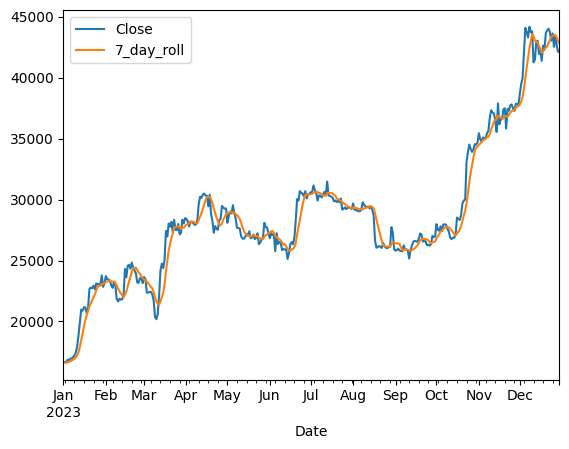

In [69]:
# 7-Day rolling average of the closing price 
df['7_day_roll'] = df['Close'].rolling(window=7).mean()
df[['Close', '7_day_roll']].loc['2023'].plot()
plt.show()

In [70]:
# Find out the highest average month
df.resample('M').mean()['Close'].idxmax()

Timestamp('2021-11-30 00:00:00')

In [71]:
# Calculate Daily Returns
df['daily_returns'] = df['Close'].pct_change()*100

In [72]:
# Days with more than 10% change in closing price
df[abs(df['daily_returns']) > 10]

,Open,High,Low,Close,Adj Close,Volume,7_day_roll,daily_returns
Date,,,,,,,,
2014-11-12,367.984985,429.717987,367.984985,423.561005,423.561005,45783200,365.519579,15.193570
2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400,310.171718,-10.776686
2015-01-13,267.394012,268.277008,219.906006,225.860992,225.860992,72843904,271.743853,-15.659308
2015-01-14,223.893997,223.893997,171.509995,178.102997,178.102997,97638704,255.138994,-21.144862
2015-01-15,176.897003,229.067001,176.897003,209.843994,209.843994,81773504,244.638280,17.821709
...,...,...,...,...,...,...,...,...
2022-09-09,19328.140625,21439.410156,19310.962891,21381.152344,21381.152344,48469528171,19781.450056,10.612188
2022-11-08,20600.671875,20664.607422,17603.544922,18541.271484,18541.271484,118992465607,20409.998326,-10.006132
2022-11-09,18543.761719,18590.458984,15682.692383,15880.780273,15880.780273,102905151606,19798.752093,-14.349022


Data Visualization

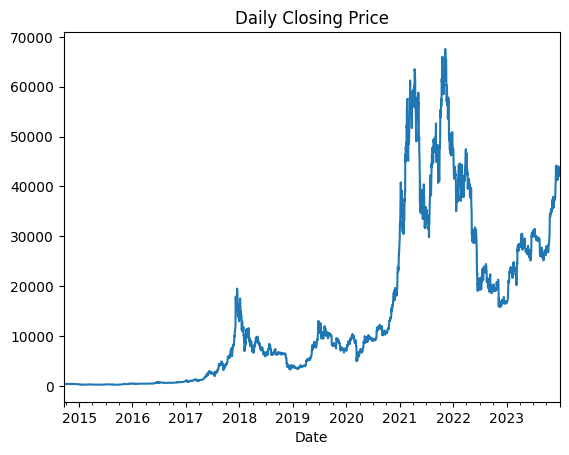

In [73]:
# Daily Closing Price
df['Close'].plot(title='Daily Closing Price')
plt.show()

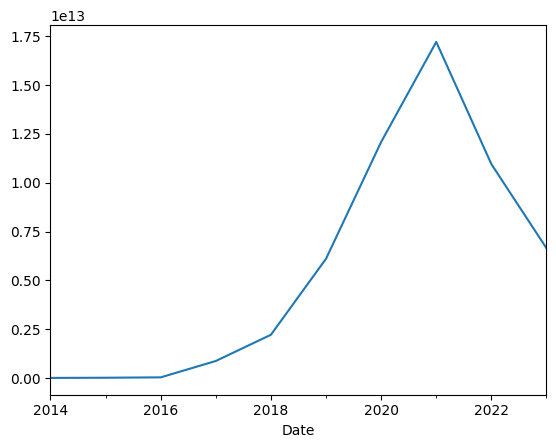

In [74]:
# Plot the Yearly Volume
df.resample('Y').sum()['Volume'].plot()
plt.show()

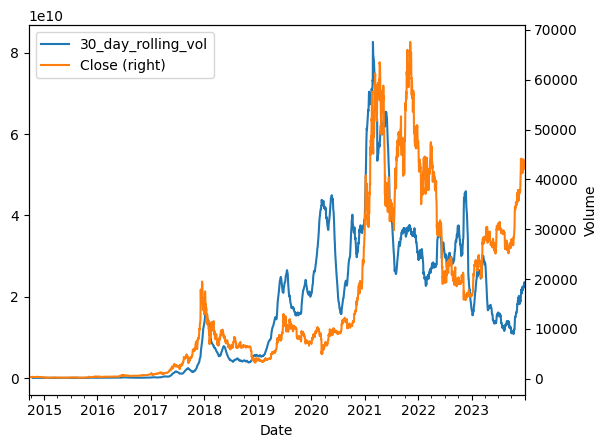

In [75]:
# Plotting Closing Price and 30-day rolling Volume
df['30_day_rolling_vol'] = df['Volume'].rolling(window=30).mean()
df['30_day_rolling_vol'].plot(legend=True)
ax = df['Close'].plot(secondary_y=True, legend=True)
ax.set_ylabel('Volume')
plt.show()

In [76]:
# Correlation between the 30-day rolling Volume and Closing Price
df[['Close', '30_day_rolling_vol']].corr()

,Close,30_day_rolling_vol
Close,1.000000,0.750445
30_day_rolling_vol,0.750445,1.000000


Data Manipulation

In [77]:
# Identify missing values
df.isnull().sum()

# Fill Missing values
df['30_day_rolling_vol'].fillna(method = 'bfill', inplace=True)

# Interpolate missing 7 day rolling
df['7_day_roll'].interpolate(inplace=True)

In [78]:
# Identify missing values
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Adj Close             0
Volume                0
7_day_roll            6
daily_returns         1
30_day_rolling_vol    0
dtype: int64

In [79]:
# Extract Time Variables
df['year'] = df.index.year
df['month'] = df.index.month
df['day'] = df.index.day
df['weekday'] = df.index.day_name()
df['weekday_numeric'] = df.index.weekday

df['is_weekend'] = df.index.weekday > 4

df.head()

,Open,High,Low,Close,Adj Close,Volume,7_day_roll,daily_returns,30_day_rolling_vol,year,month,day,weekday,weekday_numeric,is_weekend
Date,,,,,,,,,,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800,NaN,NaN,3.624856e+07,2014,9,17,Wednesday,2,False
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200,NaN,-7.192558,3.624856e+07,2014,9,18,Thursday,3,False
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700,NaN,-6.984265,3.624856e+07,2014,9,19,Friday,4,False
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600,NaN,3.573492,3.624856e+07,2014,9,20,Saturday,5,True
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100,NaN,-2.465854,3.624856e+07,2014,9,21,Sunday,6,True


In [80]:
# Feature Engineering - Lagged values
df['closed_lag1'] = df['Close'].shift(1)
df['closed_lag2'] = df['Close'].shift(2)

#### Seasonality

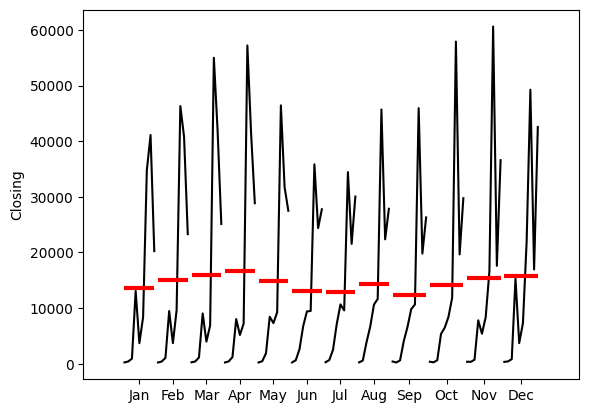

In [81]:
# Plotting the monthly seasonality
month_plot(df['Close'].resample('M').mean(), ylabel='Closing')
plt.show()

###### Very tiny seasonality

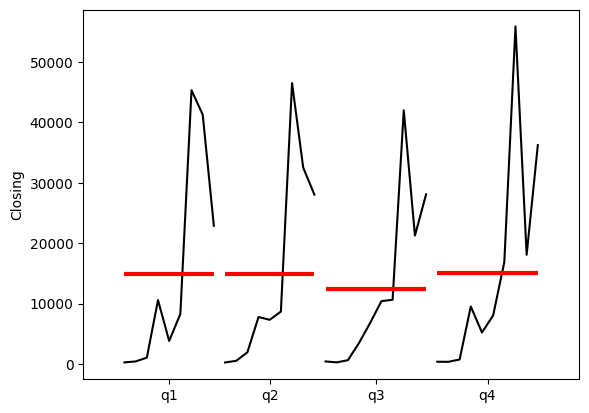

In [82]:
# Plotting the quarterly seasonality
quarter_plot(df['Close'].resample('Q').mean(), ylabel='Closing')
plt.show()

###### Financial data is not known for seasonality

In [ ]:
# Choco Data
df_choco = pd.read_csv("C:/Users/Time Series Forecasting/TSF.2.choco_monthly_revenue.csv", index_col=0, parse_dates=True)
df_choco.head()

,revenue
Month with Year,
2018-01-01,1458
2018-02-01,1102
2018-03-01,1584
2018-04-01,1676
2018-05-01,1461


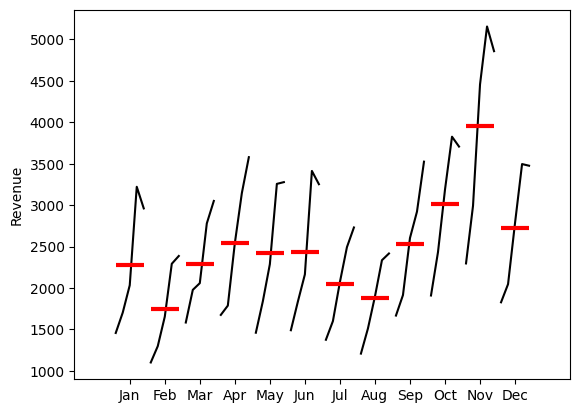

In [84]:
# Plotting the monthly seasonality
month_plot(df_choco['revenue'], ylabel='Revenue')
plt.show()

Seasonal Decomposition

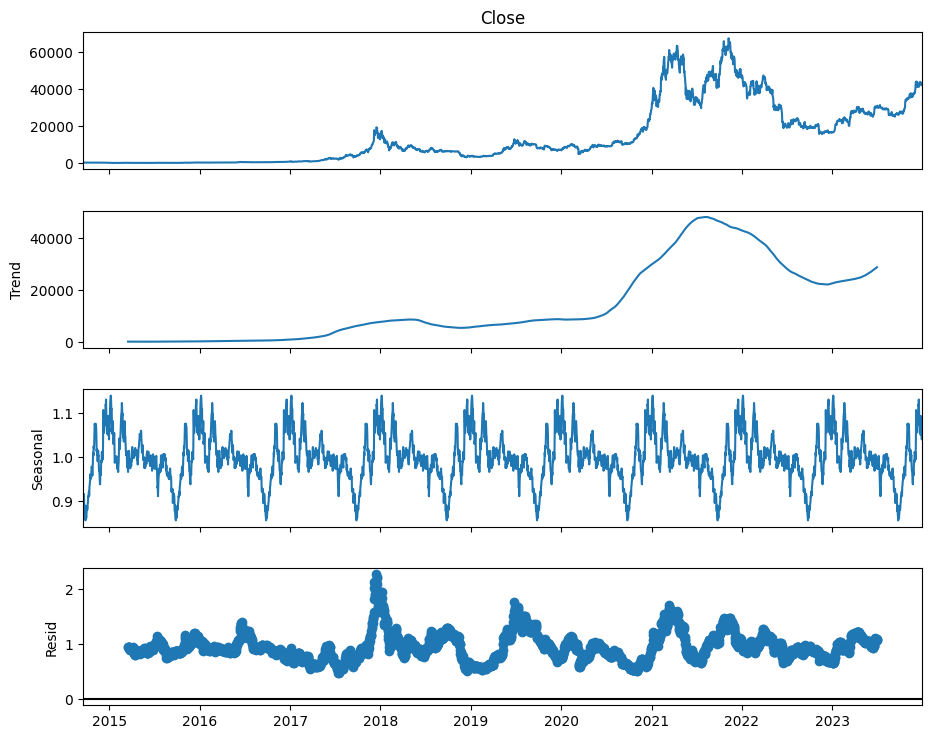

In [85]:
# Seasonal Decomposition Plots for Bitcoin Data
decomposition = seasonal_decompose(df['Close'],
                                    model='multiplicative',
                                    period=365)

fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

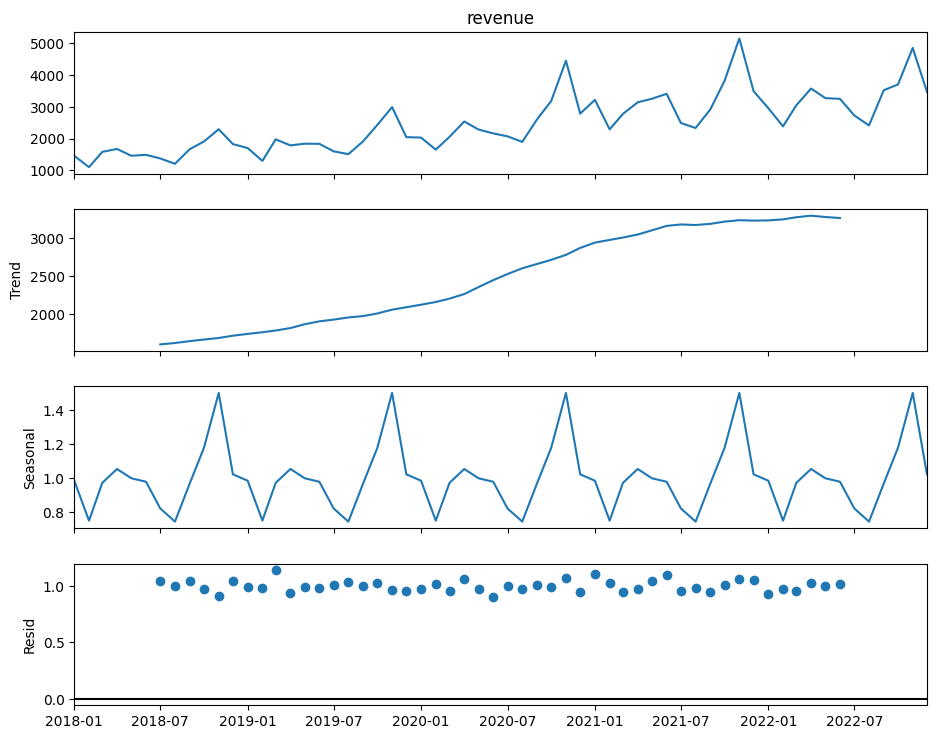

In [86]:
# Seasonal Decomposition Plots for Chocolate Revenue Data
decomposition = seasonal_decompose(df_choco['revenue'],
                                    model='mul',
                                    period=12)

fig = decomposition.plot()
fig.set_size_inches(10,8)
plt.show()

Seasonality:
* 24 for hourly
* 7 or 365 for daily, but 7 is preferred for modelling
* 52 for weekly
* 12 for monthly
* 4 for quarterly
* 5 for weekdays

#### Auto-Correlation

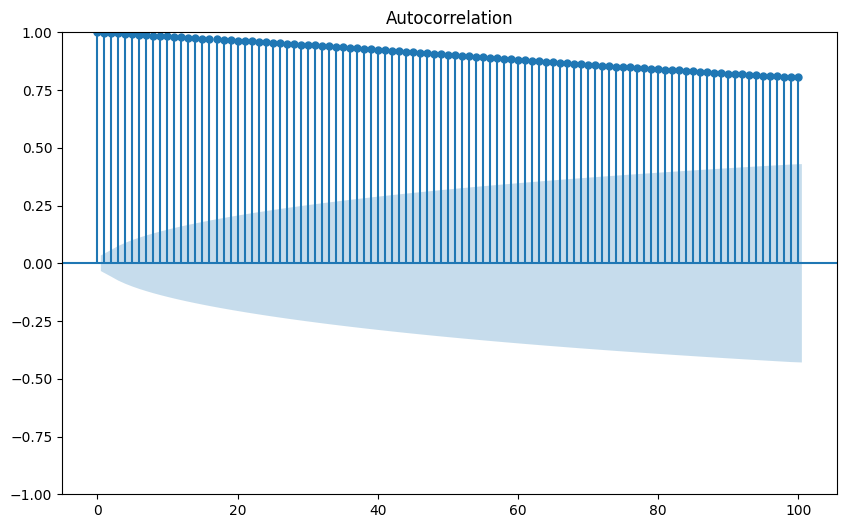

In [87]:
# Plot the autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df['Close'], lags = 100, ax=ax)
plt.show()

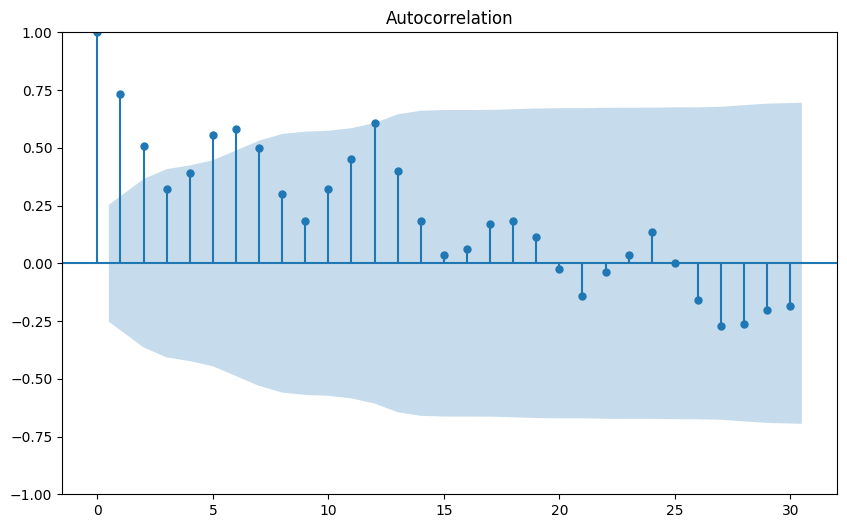

In [88]:
# Plot the autocorrelation (ACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_acf(df_choco['revenue'], lags = 30, ax=ax)
plt.show()

Partial Auto-Correlation

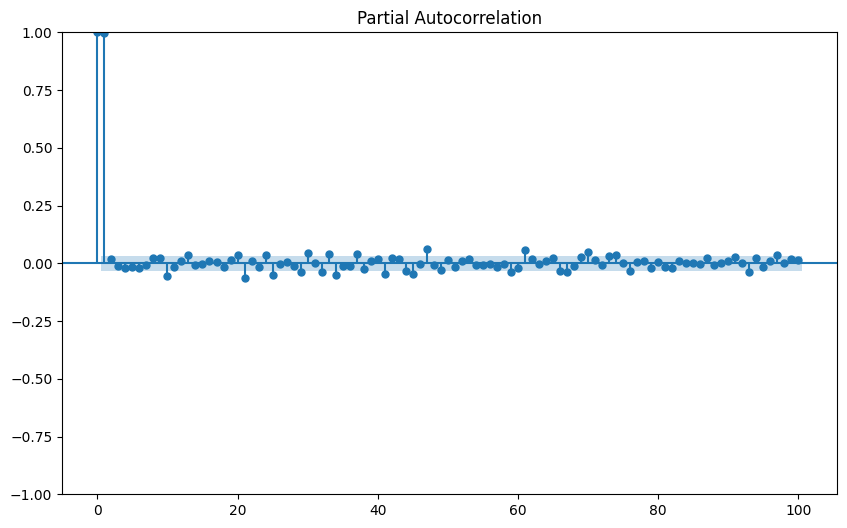

In [89]:
# Plot the partial autocorrelation (PACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df['Close'], lags = 100, ax=ax)
plt.show()

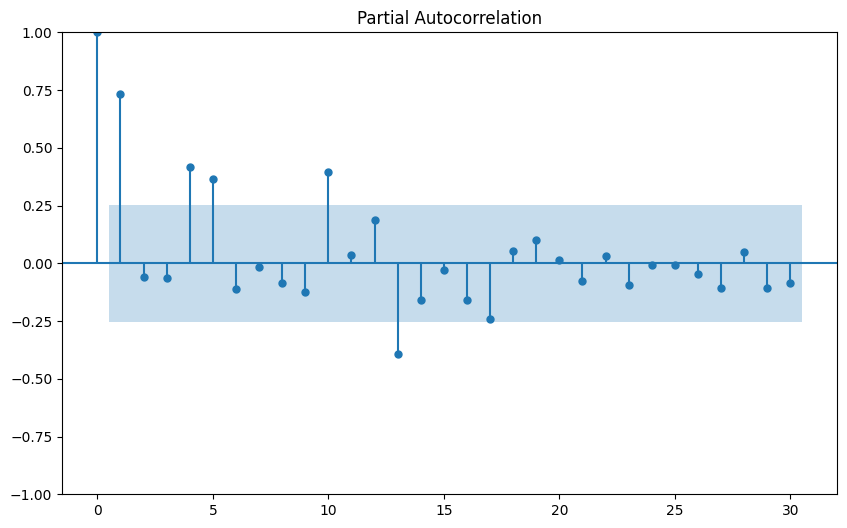

In [90]:
# Plot the partial autocorrelation (PACF)
fig, ax = plt.subplots(figsize=(10,6))
plot_pacf(df_choco['revenue'], lags = 30, ax=ax)
plt.show()